# Preâmbulo

A tecnica de gradiente é uma tecnica muito utilizada em visão computacional, pois ela calcula as variações de uma imagem no eixo x e y, sendo assim capaz de detectar bordas, algo muito importante no processamento de imagens.

# Código

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
def histograma(img):
    mpl.rc("savefig", dpi = 150)
    rows, cols = img.shape
    hist, bins = np.histogram(img , range =(0,256), bins =64)
    hist = hist / float(rows*cols)
    center = (bins [:-1] + bins [1:])/ 2
    plt.bar(center , hist ,color='m', width =4)
    plt.xlim ([0 ,256])
    plt.ylim ([0 ,0.1])
    plt.ylabel('$p(f(x,y))$', fontsize =16)
    plt.xlabel('Intensidade ', fontsize =16)
    m_y = 0.005
    m = np.mean(img)
    s = np.std(img)
    plt.plot(m, m_y , "ko")
    plt.plot([m - s, m + s], [m_y] * 2, "k--");
    plt.show()
    print  ('\nMedia: ', np.mean(img))
    print  ('Desvio Padrao: ',np.std(img))

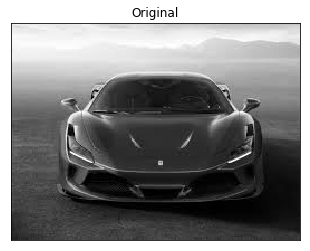

In [3]:
imgname = 'carro'

img = cv2.imread(imgname + '.jpeg',0)
img_double = img / 255
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

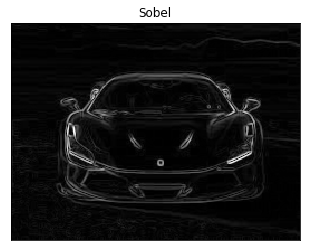

In [4]:
filtro_sobelx = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
filtro_sobely = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

sobelx = cv2.filter2D(img_double, -1, filtro_sobelx)
sobely = cv2.filter2D(img_double, -1, filtro_sobely)

sobel_double = np.sqrt(sobelx ** 2 + sobely ** 2).astype(np.float64)
sobel = sobel_double * 255

plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

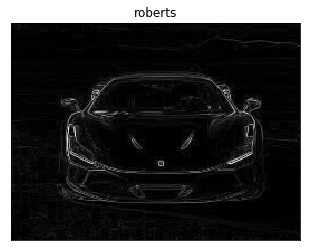

In [5]:
filtro_robertsx = np.array([[-1, 0],[0, 1]])
filtro_robertsy = np.array([[0, -1],[1, 0]])

robertsx = cv2.filter2D(img_double, -1, filtro_robertsx)
robertsy = cv2.filter2D(img_double, -1, filtro_robertsy)

roberts_double = np.sqrt(robertsx ** 2 + robertsy ** 2).astype(np.float64)
roberts = roberts_double * 255

plt.imshow(roberts,cmap = 'gray')
plt.title('roberts'), plt.xticks([]), plt.yticks([])

plt.show()

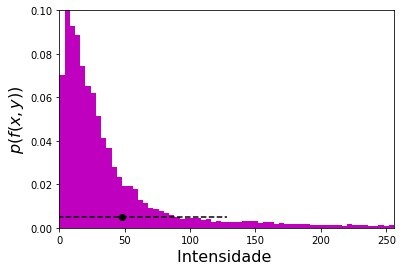


Media:  48.11105450471727
Desvio Padrao:  79.95247964582894


In [6]:
histograma(sobel)

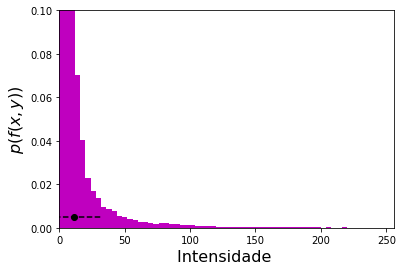


Media:  11.375639218033555
Desvio Padrao:  20.58438965583877


In [7]:
histograma(roberts)

# Resultados

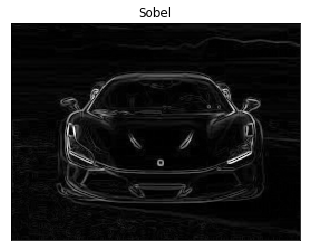

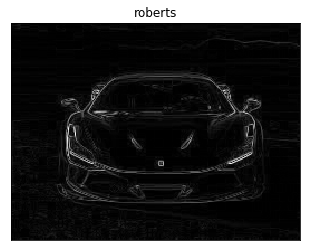

Sobel
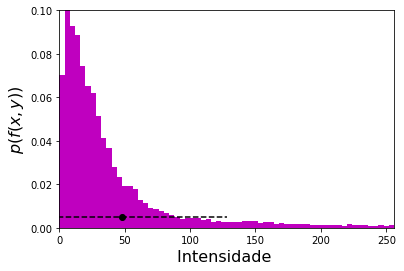

Roberts 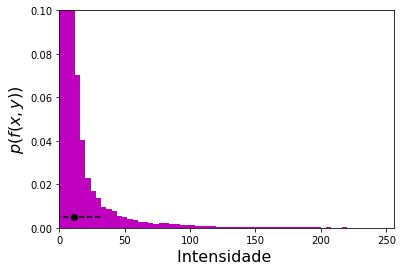

|  Filtro |  Media | Desvio Padrão |
|:-------:|:------:|:-------------:|
|  Sobel  |  48.11 |     79.95     |
| Roberts |  11.37 |     20.58     |

# Análises

Como podemos ver analisando tanto as imagens quanto os histogramas o filtro de sobel é capaz de detectar melhor as bordas, pois gerou uma imgagem com contornos mais definidos é com uma media maior do que a do roberts, mostrando essa capacidade mais aguçada, e tambem por apresemtar menos "fantasmas" nas imagens percebemos que ele é bem menos sucetivel a ruido.

Isso se deve grande parte ao fato de utilizar uma vizinhança maior para aplicar o filtro e os pessos maiores em posições mais proximas